# Lab #5 (Root finding)
### By Stakhov K.V. [8.1212]

### 1. Write a program to determine an approximation of `√2` by finding a root `x` of the function `f(x) = 2 − x^2` using the bisection algorithm. Choose a tolerance for the approximation of the root of `10^(−8)`.


Root of f(x) = 2 - x^2: x_0 ≈ 1.414213567972183 ± 1e-08


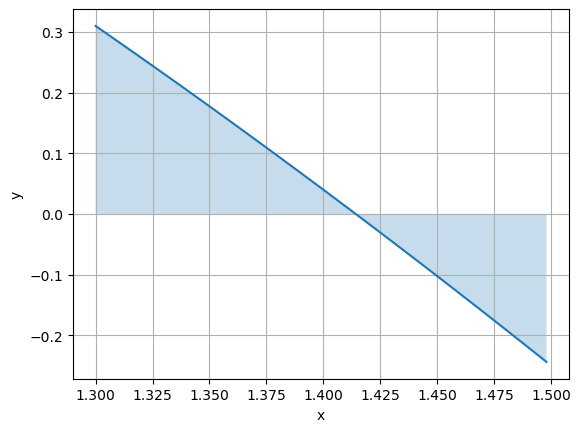

In [1]:
from scipy.optimize import bisect
import numpy as np
import matplotlib.pyplot as plt

def plot(f, a, b):
    x = np.arange(a, b, (b - a) / 100)
    f_x = np.array([f(xi) for xi in x])
    fig, ax = plt.subplots()
    ax.fill_between(x, f_x, alpha = 0.25)
    ax.plot(x, f_x, label = "f(x)")
    ax.set(xlabel = "x", ylabel = "y")
    ax.grid()
    fig.show()

err = 1e-8 # Approximation tolerance
f = lambda x: 2 - x ** 2 # Function f(x)
a, b = 1.3, 1.5 # Bisection interval

x0 = bisect(f, a, b, xtol = err) # Find the root using bisection method

print(f"Root of f(x) = 2 - x^2: x_0 ≈ {x0} ± {err}")

plot(f, a, b)

### 2. Document your choice of the initial bracket `[a, b]` for the root: which values have you chosen for `a` and for `b` and why?  

I chose the interval $[1.3; 1.5]$ to approximate the value of $ √{2} $ accurately; we know that the needed value is somewhere between $1.3$ and $1.5$, so function's values should have different signs in these points (this the requirement of bisection method).

### 3. Compute the value of `√2` using `math.sqrt(2)` and compare this with the approximation of the root. How big is the absolute error of `x`? How does this compare with `xtol`?

In [2]:
from math import sqrt

exact_x0 = sqrt(2)
exact_err = abs(exact_x0 - x0)

print(f"Exact error: {exact_err:.6e}")
print(f"xtol - exact_err = {err - exact_err:.6e}")

Exact error: 5.599088e-09
xtol - exact_err = 4.400912e-09


The exact error is $ 5.6*10^{-9} $ and $ xtol $ is greater than the exact error by $ 4.4*10^{-9} $.

### 4. Write a program to determine an approximation of `√2` by finding a root `x` of the function `f(x) = 2 − x^2` using the `fsolve` function. Compare the result of the `fsolve` function with the result of the bisection algorithm.

In [3]:
from scipy.optimize import fsolve

fsolve_x0 = fsolve(f, 1.3) # Find the root using `fsolve`
fsolve_exact_err = exact_x0 - fsolve_x0
fsolve_bisect_err = exact_err - fsolve_exact_err

print(f"Root of f(x) = 2 - x^2: x_0 ≈ {fsolve_x0}")
print(f"Exact error: {fsolve_exact_err}")
print(f"Error relative to bisection algorithm result: {fsolve_bisect_err}")

Root of f(x) = 2 - x^2: x_0 ≈ [1.41421356]
Exact error: [2.22044605e-16]
Error relative to bisection algorithm result: [5.59908764e-09]


As we can see, the exact error of `fsolve` is multiple orders of magnitude smaller than the error of bisection method and is equal to $ 2.2 * 10^{-16} $ as opposed to $ 5.6*10^{-9} $ for bisection.